# Tips for Large Amounts of Data

## 1. Glob

Sometimes you have a folder of data files you want to analyze. Glob is a package that makes reading in these files really easy.

In [15]:
import glob # OR os.listdir()
from astropy.io import fits
import numpy as np
import time
import matplotlib.pyplot as plt

In [29]:
!ls 

Untitled.ipynb                       tips_for_large_amounts_of_data.ipynb
sample_data


In [28]:
!ls sample_data/

1000.fits 1008.fits 2001.fits 2009.fits 3002.fits 3010.fits 4003.fits 4011.fits
1001.fits 1009.fits 2002.fits 2010.fits 3003.fits 3011.fits 4004.fits 4012.fits
1002.fits 1010.fits 2003.fits 2011.fits 3004.fits 3012.fits 4005.fits 4013.fits
1003.fits 1011.fits 2004.fits 2012.fits 3005.fits 3013.fits 4006.fits 4014.fits
1004.fits 1012.fits 2005.fits 2013.fits 3006.fits 3014.fits 4007.fits
1005.fits 1013.fits 2006.fits 2014.fits 3007.fits 4000.fits 4008.fits
1006.fits 1014.fits 2007.fits 3000.fits 3008.fits 4001.fits 4009.fits
1007.fits 2000.fits 2008.fits 3001.fits 3009.fits 4002.fits 4010.fits


60
['sample_data/1000.fits', 'sample_data/1001.fits', 'sample_data/1002.fits', 'sample_data/1003.fits', 'sample_data/1004.fits']


Text(0, 0.5, 'Flux [arb. units]')

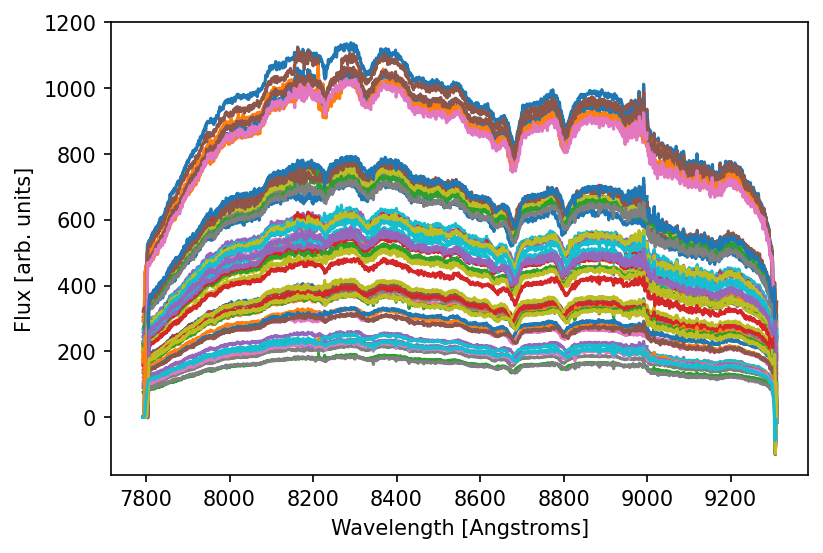

In [31]:
# these are fits tables of specta which i want to load into memory
files = sorted(glob.glob('sample_data/*'))

print(len(files))
print(files[0:5])


plt.figure(dpi=150)
for file in files:
    with fits.open(file) as f:
        w = f[0].header['CRVAL1'] + f[0].header['CDELT1']*np.arange(f[0].header['NAXIS1'])
        s = f[0].data
        plt.plot(w,s)
        f.close()
        

plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux [arb. units]')

## 2. Avoid append

Every time you call .append(), Python makes a new identical array with one extra empty element (effectively doubling current memory use!). When you have hundreds/thousands of images, this uses **LOTS** of memory.

Instead, try pre-making arrays and assigning values:

In [19]:
def assign():
    t = time.time()
    
    
    spec = np.zeros((len(files),len(s)))

    for i, file in enumerate(files):
        f = fits.open(file)
        spec[i] = f[0].data
        f.close()
    print(time.time() - t)

In [20]:
assign()

0.10257673263549805


## 3. Separate data processing into multiple notebooks and many functions.

Saves on memory, makes more efficient so you don't have to keep recording the same things, can iterate quickly.

For example, break up code into chunks/functions/notebooks that might look something like:

* load_in_image(file_name) --> save output
* process_image(file_name) --> save output
* make_measurement_from_image(file_name) --> save output
* plot_image_analysis(file_name) --> save output

Sometimes, if you're dealing with $\texttt{numpy}$ arrays and people using Python, saving things as .npy files can be nice! This is done with np.save()/np.savez(). Otherwise, I always think simple text files or .csv's are **always** easier.

## 4. Take a few minutes to think about code efficiency *before* you code. Think about speed and memory, and remember to utilize Numpy functions!

## 5. Feel free to add print statements with updates on where you are at in the code! It can be both fun and informative!

tqdm

Be careful, though! Don't print every iteration in a loop for example because printing itself is slow. Try to print every n'th pass, or something.

## 6. Consider reading in the data only once, and then using subsets of a larger array.

In [21]:
all_images = np.random.rand(50,100,100)

# each image is now along the first dimension

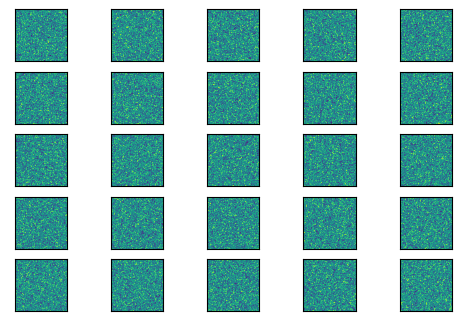

In [22]:
fig, axes = plt.subplots(5,5,dpi=100)
for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i])
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])